In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
import cv2
import torch
import numpy as np
import pandas as pd
from PIL import Image
from tqdm.auto import tqdm, trange
import seaborn as sns
from matplotlib import pyplot as plt
import sys
sys.path.append("/n/home12/binxuwang/Github/DiffusionObjectRelation/utils")
from cv2_eval_utils import find_classify_object_masks

positive_threshold = 180 
saveroot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/results/objrel_rndembdposemb_DiT_B_pilot/latent_store"

In [97]:
# try to classify top (+) and down (-) objects
# 0,1,8,9 are the prompts that have above or below.
for prompt_idx in [8,9]:
    for seed_idx in trange(10):
        latent_file = f"red_blue_8_pos_rndembposemb_img_latent_residual_prompt{prompt_idx}_seed{seed_idx}.pkl"
        latent_path = os.path.join(saveroot, latent_file)

        with open(latent_path, 'rb') as f:
            data = pickle.load(f)
        prompt = data['prompt']
        image_logs = data['image_logs']
        batch_size = len(image_logs[0]['images'])
        residual_state_traj = data['block_11_residual_spatial_state_traj']
        t_traj = data['t_traj']
        raise ValueError("Not implemented")

  0%|          | 0/10 [00:00<?, ?it/s]

ValueError: Not implemented

In [98]:
t_traj_list = [t.item() for t in t_traj[0]]

### PCA visualization in 3d top PC space

In [99]:
# visualize trajectory 
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [107]:
%matplotlib inline

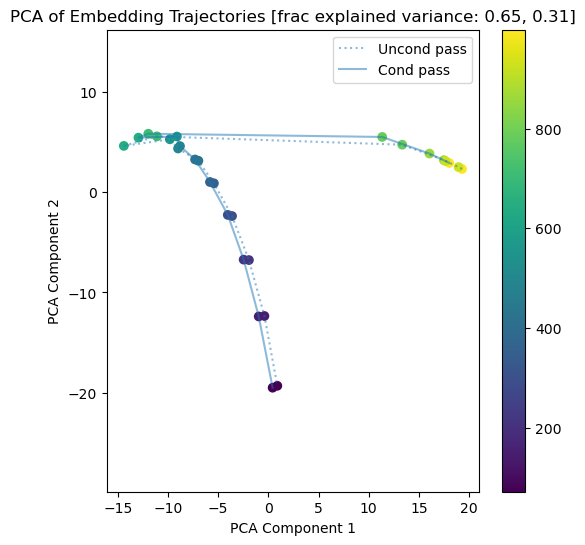

In [124]:
sample_id = 0
H_idx, W_idx = 3,4 
single_token_emb_traj_uncond = residual_state_traj[:, sample_id, H_idx, W_idx, :]
single_token_emb_traj_cond = residual_state_traj[:, batch_size + sample_id, H_idx, W_idx, :]

pca = PCA(n_components=2)
# pca.fit(single_token_emb_traj_uncond)
pca.fit(single_token_emb_traj_cond)

explained_variance_ratio = pca.explained_variance_ratio_
uncond_traj_pca = pca.transform(single_token_emb_traj_uncond)
cond_traj_pca = pca.transform(single_token_emb_traj_cond)

plt.figure(figsize=(6, 6))
plt.plot(uncond_traj_pca[:, 0], uncond_traj_pca[:, 1], label='Uncond pass', alpha=0.5, linestyle=':', color='C0')#marker=".")#marker='o')
plt.plot(cond_traj_pca[:, 0], cond_traj_pca[:, 1], label='Cond pass', alpha=0.5, linestyle='-', color='C0')#marker=".")#marker='o')
# color by t_traj_list
plt.scatter(uncond_traj_pca[:, 0], uncond_traj_pca[:, 1], c=t_traj_list, cmap='viridis')
plt.scatter(cond_traj_pca[:, 0], cond_traj_pca[:, 1], c=t_traj_list, cmap='viridis')
plt.colorbar()
plt.axis('equal')
plt.legend()
plt.title(f'PCA of Embedding Trajectories [frac explained variance: {explained_variance_ratio[0]:.2f}, {explained_variance_ratio[1]:.2f}]')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

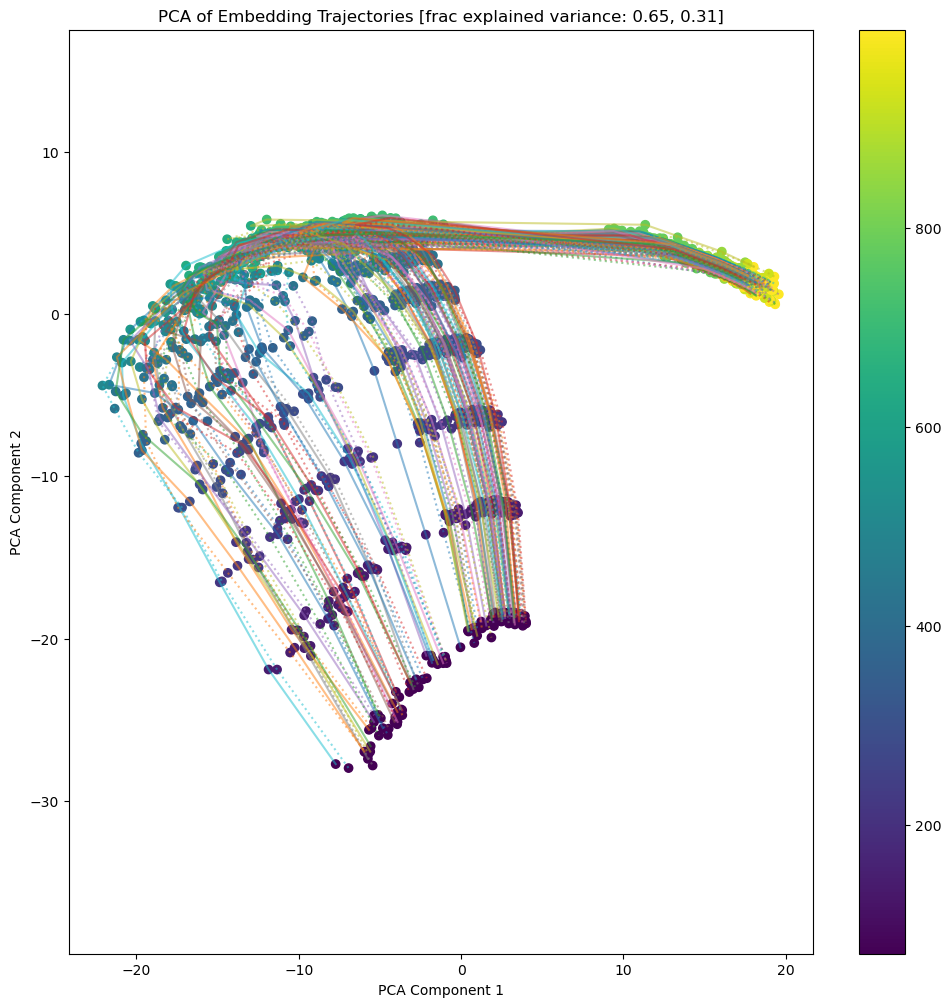

In [112]:
pca = PCA(n_components=2)
# pca.fit(single_token_emb_traj_uncond)
pca.fit(single_token_emb_traj_cond)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(12, 12))
sample_id = 0
H_idx, W_idx = 3,4 
for H_idx in range(8):
    for W_idx in range(8):
        single_token_emb_traj_uncond = residual_state_traj[:, sample_id, H_idx, W_idx, :]
        single_token_emb_traj_cond = residual_state_traj[:, batch_size + sample_id, H_idx, W_idx, :]
        uncond_traj_pca = pca.transform(single_token_emb_traj_uncond)
        cond_traj_pca = pca.transform(single_token_emb_traj_cond)
        color = f"C{H_idx*8+W_idx}"
        plt.plot(uncond_traj_pca[:, 0], uncond_traj_pca[:, 1], label='Uncond pass', alpha=0.5, linestyle=':', color=color)#marker=".")#marker='o')
        plt.plot(cond_traj_pca[:, 0], cond_traj_pca[:, 1], label='Cond pass', alpha=0.5, linestyle='-', color=color)#marker=".")#marker='o')
        # color by t_traj_list
        plt.scatter(uncond_traj_pca[:, 0], uncond_traj_pca[:, 1], c=t_traj_list, cmap='viridis')
        plt.scatter(cond_traj_pca[:, 0], cond_traj_pca[:, 1], c=t_traj_list, cmap='viridis')
        
plt.colorbar()
plt.axis('equal')
# plt.legend()
plt.title(f'PCA of Embedding Trajectories [frac explained variance: {explained_variance_ratio[0]:.2f}, {explained_variance_ratio[1]:.2f}]')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

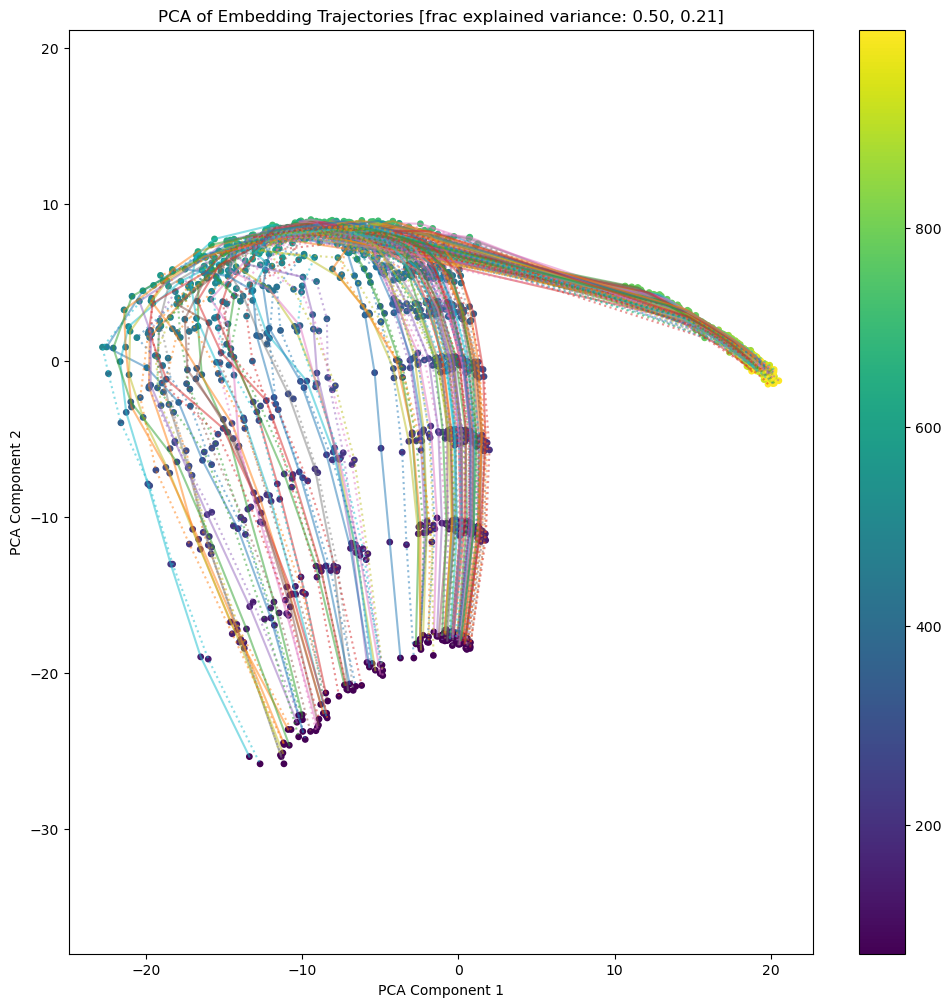

In [113]:
pca = PCA(n_components=2)
# pca.fit(single_token_emb_traj_uncond)
embed_collection = residual_state_traj[:, [0, 25], :, :].reshape(-1, residual_state_traj.shape[-1])
pca.fit(embed_collection)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(12, 12))
sample_id = 0
H_idx, W_idx = 3,4 
for H_idx in range(8):
    for W_idx in range(8):
        single_token_emb_traj_uncond = residual_state_traj[:, sample_id, H_idx, W_idx, :]
        single_token_emb_traj_cond = residual_state_traj[:, batch_size + sample_id, H_idx, W_idx, :]
        uncond_traj_pca = pca.transform(single_token_emb_traj_uncond)
        cond_traj_pca = pca.transform(single_token_emb_traj_cond)
        color = f"C{H_idx*8+W_idx}"
        plt.plot(uncond_traj_pca[:, 0], uncond_traj_pca[:, 1], label='Uncond pass', alpha=0.5, linestyle=':', color=color)#marker=".")#marker='o')
        plt.plot(cond_traj_pca[:, 0], cond_traj_pca[:, 1], label='Cond pass', alpha=0.5, linestyle='-', color=color)#marker=".")#marker='o')
        # color by t_traj_list
        plt.scatter(uncond_traj_pca[:, 0], uncond_traj_pca[:, 1], s=15, c=t_traj_list, cmap='viridis')
        plt.scatter(cond_traj_pca[:, 0], cond_traj_pca[:, 1], s=15, c=t_traj_list, cmap='viridis')
        
plt.colorbar()
plt.axis('equal')
# plt.legend()
plt.title(f'PCA of Embedding Trajectories [frac explained variance: {explained_variance_ratio[0]:.2f}, {explained_variance_ratio[1]:.2f}]')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [114]:
%matplotlib widget   

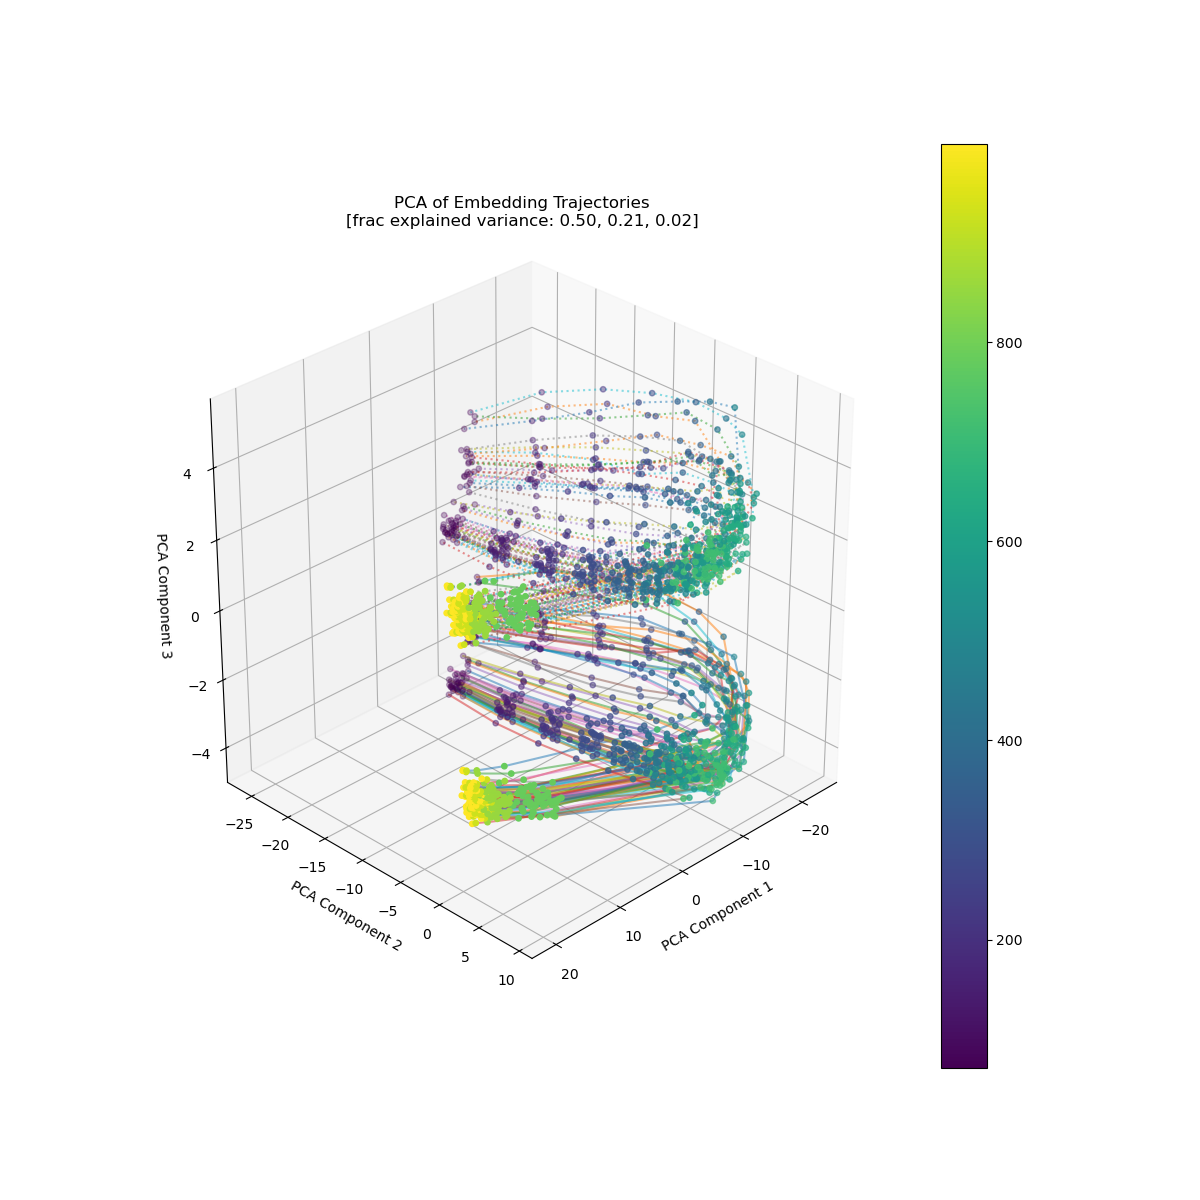

In [115]:
pca = PCA(n_components=3)
# fit the uncond and cond pass hidden states across space and time. 
embed_collection = residual_state_traj[:, [0, 25], :, :].reshape(-1, residual_state_traj.shape[-1])
pca.fit(embed_collection)
explained_variance_ratio = pca.explained_variance_ratio_

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
sample_id = 0
H_idx, W_idx = 3,4 
for H_idx in range(8):
    for W_idx in range(8):
        single_token_emb_traj_uncond = residual_state_traj[:, sample_id, H_idx, W_idx, :]
        single_token_emb_traj_cond = residual_state_traj[:, batch_size + sample_id, H_idx, W_idx, :]
        uncond_traj_pca = pca.transform(single_token_emb_traj_uncond)
        cond_traj_pca = pca.transform(single_token_emb_traj_cond)
        color = f"C{H_idx*8+W_idx}"
        ax.plot(uncond_traj_pca[:, 0], uncond_traj_pca[:, 1], uncond_traj_pca[:, 2], 
                label='Uncond pass', alpha=0.5, linestyle=':', color=color)
        ax.plot(cond_traj_pca[:, 0], cond_traj_pca[:, 1], cond_traj_pca[:, 2],
                label='Cond pass', alpha=0.5, linestyle='-', color=color)
        # color by t_traj_list
        scatter1 = ax.scatter(uncond_traj_pca[:, 0], uncond_traj_pca[:, 1], uncond_traj_pca[:, 2], 
                            s=15, c=t_traj_list, cmap='viridis')
        scatter2 = ax.scatter(cond_traj_pca[:, 0], cond_traj_pca[:, 1], cond_traj_pca[:, 2],
                            s=15, c=t_traj_list, cmap='viridis')

plt.colorbar(scatter1)
ax.set_box_aspect([1,1,1])
ax.view_init(elev=30, azim=45)
# plt.legend()
ax.set_title(f'PCA of Embedding Trajectories\n[frac explained variance: {explained_variance_ratio[0]:.2f}, {explained_variance_ratio[1]:.2f}, {explained_variance_ratio[2]:.2f}]')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2') 
ax.set_zlabel('PCA Component 3')
plt.show()

### Deviation from 2d dimension PC predicts the object emergence 

In [ ]:
residual_state_traj[:, 0, ].shape

torch.Size([14, 8, 8, 768])

In [117]:
%matplotlib inline

In [121]:
sample_id = 5
expl_var_arr = np.empty((2, 8, 8), dtype=float)
for H_idx in range(8):
    for W_idx in range(8):
        embed_collection = residual_state_traj[:, sample_id, H_idx, W_idx]
        pca = PCA(n_components=2)
        pca.fit(embed_collection)
        expl_var_arr[0, H_idx, W_idx] = pca.explained_variance_ratio_.sum()
        
        embed_collection = residual_state_traj[:, batch_size+sample_id, H_idx, W_idx]
        pca = PCA(n_components=2)
        pca.fit(embed_collection)
        expl_var_arr[1, H_idx, W_idx] = pca.explained_variance_ratio_.sum()
        # print(f"H_idx: {H_idx}, W_idx: {W_idx}, expl. var. ratio: {pca.explained_variance_ratio_.sum()}")
        # print(pca.explained_variance_ratio_)
print(expl_var_arr[0])

[[0.9787706  0.98061037 0.96382132 0.9506898  0.94608001 0.96169701
  0.97709276 0.97756671]
 [0.98160904 0.97369259 0.93607793 0.93856398 0.93458554 0.95394873
  0.97519796 0.97888098]
 [0.98204512 0.97306231 0.93816242 0.93891178 0.92833592 0.94743216
  0.97545907 0.98168865]
 [0.98146618 0.97867702 0.95799651 0.95086632 0.95000831 0.95770691
  0.97458069 0.97913764]
 [0.97966107 0.97983999 0.97585815 0.97275745 0.97018433 0.96962225
  0.97283773 0.97317353]
 [0.97860199 0.97986645 0.97555022 0.96439282 0.95817441 0.95069085
  0.94535635 0.96599409]
 [0.97923882 0.97878247 0.97585354 0.9662268  0.95263152 0.95468588
  0.94518992 0.96287413]
 [0.97959539 0.98003335 0.97740962 0.96902206 0.95401753 0.94585567
  0.94626409 0.97305435]]


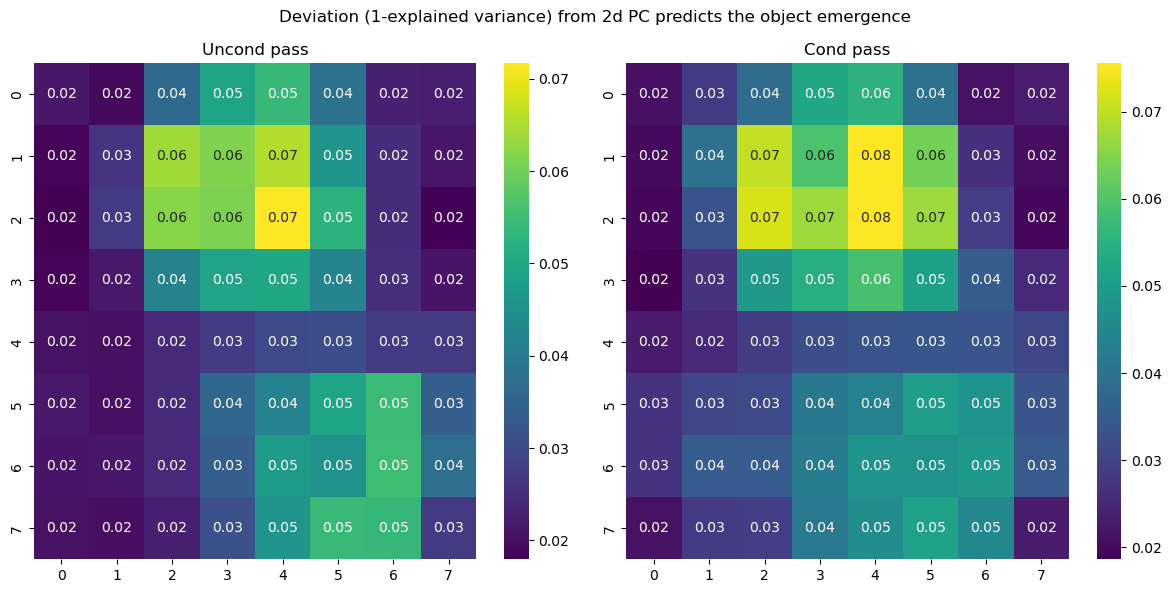

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Plot unconditioned pass
sns.heatmap(1 - expl_var_arr[0], 
            ax=ax1, cmap='viridis', annot=True, fmt='.2f', cbar=True)
ax1.set_title('Uncond pass')
# Plot conditioned pass  
sns.heatmap(1 - expl_var_arr[1],
            ax=ax2, cmap='viridis', annot=True, fmt='.2f', cbar=True)
ax2.set_title('Cond pass')
plt.suptitle('Deviation (1-explained variance) from 2d PC predicts the object emergence')
plt.tight_layout()
plt.show()

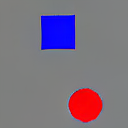

In [123]:
image_logs[0]['images'][sample_id]

In [ ]:
embed_collection = residual_state_traj[:, [29], 0, 4].reshape(-1, residual_state_traj.shape[-1])
pca = PCA(n_components=3)
pca.fit(embed_collection)
print("Total expl. var. ratio:", pca.explained_variance_ratio_.sum())
print(pca.explained_variance_ratio_)

Total expl. var. ratio: 0.9940814022465441
[0.63789551 0.34009564 0.01609025]


### Object vs non object embedding trajectory

In [130]:
from cv2_eval_utils import find_classify_object_masks


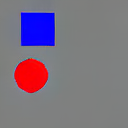

In [126]:
image_logs[0]['images'][sample_id]

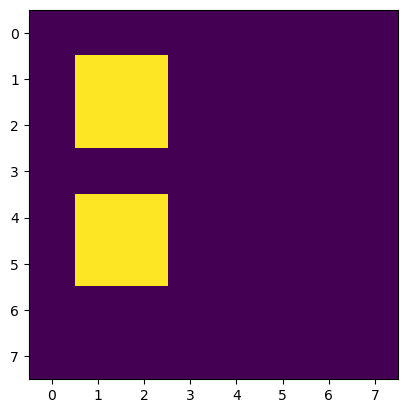

In [142]:
sample_id = 0
obj_info_df, object_mask = find_classify_object_masks(image_logs[0]['images'][sample_id])
object_mask_resized = [cv2.resize(mask, (8, 8)) for mask in object_mask]
object_mask_all = np.zeros_like(object_mask_resized[0]).astype(bool)
for mask in object_mask_resized:
    object_mask_all = np.logical_or(object_mask_all, mask)
plt.imshow(object_mask_all)

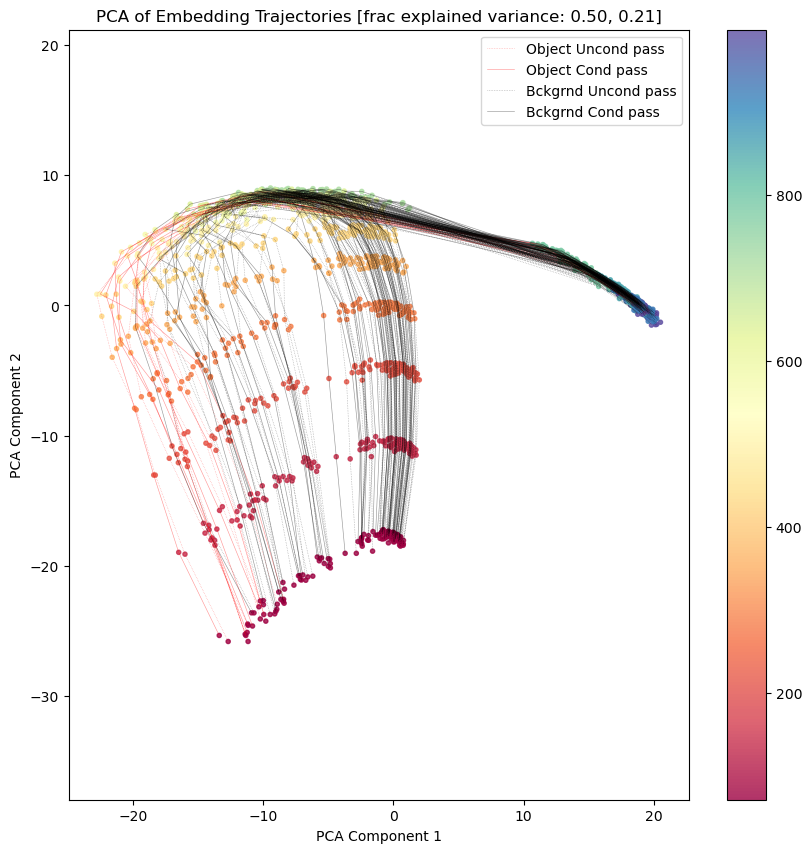

In [183]:
single_token_object_emb_traj_uncond = residual_state_traj[:, sample_id][:, object_mask_all, :].reshape(-1, residual_state_traj.shape[-1])
single_token_object_emb_traj_cond = residual_state_traj[:, batch_size + sample_id][:, object_mask_all, :].reshape(-1, residual_state_traj.shape[-1])
single_token_bckgrnd_emb_traj_uncond = residual_state_traj[:, sample_id][:, ~object_mask_all, :].reshape(-1, residual_state_traj.shape[-1])
single_token_bckgrnd_emb_traj_cond = residual_state_traj[:, batch_size + sample_id][:, ~object_mask_all, :].reshape(-1, residual_state_traj.shape[-1])

pca = PCA(n_components=2)
pca.fit(np.vstack([single_token_object_emb_traj_uncond, 
                   single_token_object_emb_traj_cond, 
                   single_token_bckgrnd_emb_traj_uncond, 
                   single_token_bckgrnd_emb_traj_cond]))

# pca.fit(np.vstack([single_token_object_emb_traj_uncond, 
#                    single_token_object_emb_traj_cond, ]))
                #    single_token_bckgrnd_emb_traj_uncond, 
                #    single_token_bckgrnd_emb_traj_cond
# pca.fit(np.vstack([single_token_bckgrnd_emb_traj_uncond, 
#                    single_token_bckgrnd_emb_traj_cond]))
                   

explained_variance_ratio = pca.explained_variance_ratio_

object_uncond_traj_pca = pca.transform(single_token_object_emb_traj_uncond).reshape(14, -1, 2)
object_cond_traj_pca = pca.transform(single_token_object_emb_traj_cond).reshape(14, -1, 2)
bckgrnd_traj_pca = pca.transform(single_token_bckgrnd_emb_traj_uncond).reshape(14, -1, 2)
bckgrnd_cond_traj_pca = pca.transform(single_token_bckgrnd_emb_traj_cond).reshape(14, -1, 2)

plt.figure(figsize=(10, 10))
lines1 = plt.plot(object_uncond_traj_pca[:, :, 0], object_uncond_traj_pca[:, :, 1], alpha=0.4, linewidth=0.45, linestyle=':', color='r')#marker=".")#marker='o')
lines1[0].set_label('Object Uncond pass')
lines2 = plt.plot(object_cond_traj_pca[:, :, 0], object_cond_traj_pca[:, :, 1], alpha=0.4, linewidth=0.45, linestyle='-', color='r')#marker=".")#marker='o')
lines2[0].set_label('Object Cond pass')
lines3 = plt.plot(bckgrnd_traj_pca[:, :, 0], bckgrnd_traj_pca[:, :, 1], alpha=0.4, linewidth=0.45, linestyle=':', color='k')#marker=".")#marker='o')
lines3[0].set_label('Bckgrnd Uncond pass')
lines4 = plt.plot(bckgrnd_cond_traj_pca[:, :, 0], bckgrnd_cond_traj_pca[:, :, 1], alpha=0.4, linewidth=0.45, linestyle='-', color='k')#marker=".")#marker='o')
lines4[0].set_label('Bckgrnd Cond pass')
# color by t_traj_list
t_traj_arr = np.array(t_traj_list)
object_t_traj_arr = t_traj_arr[:,None].repeat(object_uncond_traj_pca.shape[1], axis=1)
bckgrnd_t_traj_arr = t_traj_arr[:,None].repeat(bckgrnd_traj_pca.shape[1], axis=1)
plt.scatter(object_uncond_traj_pca[:, :, 0], object_uncond_traj_pca[:, :, 1], c=object_t_traj_arr, s=9, alpha=0.8, cmap='Spectral')
plt.scatter(object_cond_traj_pca[:, :, 0], object_cond_traj_pca[:, :, 1], c=object_t_traj_arr, s=9, alpha=0.8, cmap='Spectral')
plt.scatter(bckgrnd_traj_pca[:, :, 0], bckgrnd_traj_pca[:, :, 1], c=bckgrnd_t_traj_arr, s=9, alpha=0.8, cmap='Spectral')
plt.scatter(bckgrnd_cond_traj_pca[:, :, 0], bckgrnd_cond_traj_pca[:, :, 1], c=bckgrnd_t_traj_arr, s=9, alpha=0.8, cmap='Spectral')
plt.colorbar()
plt.axis('equal')
plt.legend()
plt.title(f'PCA of Embedding Trajectories [frac explained variance: {explained_variance_ratio[0]:.2f}, {explained_variance_ratio[1]:.2f}]')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

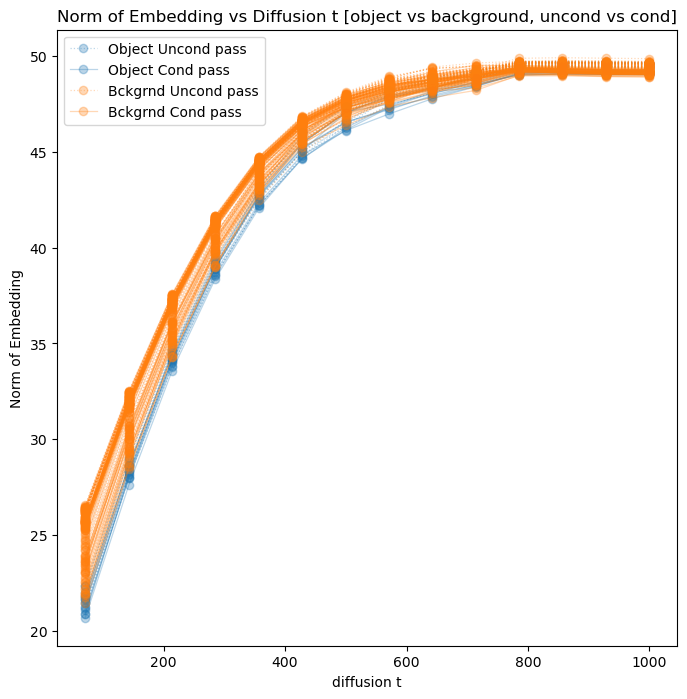

In [178]:
single_token_object_emb_traj_uncond = residual_state_traj[:, sample_id][:, object_mask_all, :].reshape(-1, residual_state_traj.shape[-1])
single_token_object_emb_traj_cond = residual_state_traj[:, batch_size + sample_id][:, object_mask_all, :].reshape(-1, residual_state_traj.shape[-1])
single_token_bckgrnd_emb_traj_uncond = residual_state_traj[:, sample_id][:, ~object_mask_all, :].reshape(-1, residual_state_traj.shape[-1])
single_token_bckgrnd_emb_traj_cond = residual_state_traj[:, batch_size + sample_id][:, ~object_mask_all, :].reshape(-1, residual_state_traj.shape[-1])
single_token_object_emb_traj_uncond_norm = (single_token_object_emb_traj_uncond ** 2).sum(axis=-1).sqrt().reshape(14, -1)
single_token_object_emb_traj_cond_norm = (single_token_object_emb_traj_cond ** 2).sum(axis=-1).sqrt().reshape(14, -1)
single_token_bckgrnd_emb_traj_uncond_norm = (single_token_bckgrnd_emb_traj_uncond ** 2).sum(axis=-1).sqrt().reshape(14, -1)
single_token_bckgrnd_emb_traj_cond_norm = (single_token_bckgrnd_emb_traj_cond ** 2).sum(axis=-1).sqrt().reshape(14, -1)

t_traj_arr = np.array(t_traj_list)
object_t_traj_arr = t_traj_arr[:,None].repeat(object_uncond_traj_pca.shape[1], axis=1)
bckgrnd_t_traj_arr = t_traj_arr[:,None].repeat(bckgrnd_traj_pca.shape[1], axis=1)

plt.figure(figsize=(8, 8))
lines1 = plt.plot(object_t_traj_arr, single_token_object_emb_traj_uncond_norm, linestyle=':', color='C0', marker='o', alpha=0.3, linewidth=0.9, )#marker=".")#marker='o') label='Object Uncond pass', 
lines2 = plt.plot(object_t_traj_arr, single_token_object_emb_traj_cond_norm, linestyle='-', color='C0', marker='o', alpha=0.3, linewidth=0.9, )#marker=".")#marker='o') label='Object Cond pass', 
lines3 = plt.plot(bckgrnd_t_traj_arr, single_token_bckgrnd_emb_traj_uncond_norm, linestyle=':', color='C1', marker='o', alpha=0.3, linewidth=0.9, )#marker=".")#marker='o') label='Bckgrnd Uncond pass', 
lines4 = plt.plot(bckgrnd_t_traj_arr, single_token_bckgrnd_emb_traj_cond_norm, linestyle='-', color='C1', marker='o', alpha=0.3, linewidth=0.9, )#marker=".")#marker='o') label='Bckgrnd Cond pass', 
lines1[0].set_label('Object Uncond pass')
lines2[0].set_label('Object Cond pass')
lines3[0].set_label('Bckgrnd Uncond pass')
lines4[0].set_label('Bckgrnd Cond pass')
plt.legend()
# plt.title(f'PCA of Embedding Trajectories [frac explained variance: {explained_variance_ratio[0]:.2f}, {explained_variance_ratio[1]:.2f}]')
plt.title('Norm of Embedding vs Diffusion t [object vs background, uncond vs cond]')
plt.xlabel('diffusion t')
plt.ylabel('Norm of Embedding')
plt.show()